<a href="https://colab.research.google.com/github/devajeeta/Complete-Python-3-Bootcamp/blob/master/Prediction_using_MLUnsupervised.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**TASK2** :From the given ‘Iris’ dataset, predict the optimum number of clusters and
represent it visually.
-by Devajeeta Datta

In [ ]:
# IMPORTING IMPORTANT LIBRARIES
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import datetime as dt

import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [ ]:
#IMPORTING DATASET
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv("Iris.csv")

In [ ]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
df['Species'] = df['Species'].apply(lambda x: x.split('-')[1])
df['Species']

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: Species, Length: 150, dtype: object

In [ ]:
df.shape

(150, 6)

In [ ]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [ ]:
df.info

<bound method DataFrame.info of       Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm    Species
0      1            5.1           3.5            1.4           0.2     setosa
1      2            4.9           3.0            1.4           0.2     setosa
2      3            4.7           3.2            1.3           0.2     setosa
3      4            4.6           3.1            1.5           0.2     setosa
4      5            5.0           3.6            1.4           0.2     setosa
..   ...            ...           ...            ...           ...        ...
145  146            6.7           3.0            5.2           2.3  virginica
146  147            6.3           2.5            5.0           1.9  virginica
147  148            6.5           3.0            5.2           2.0  virginica
148  149            6.2           3.4            5.4           2.3  virginica
149  150            5.9           3.0            5.1           1.8  virginica

[150 rows x 6 columns]>

In [ ]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [ ]:
#checking duplicates
df.duplicated().sum()

0

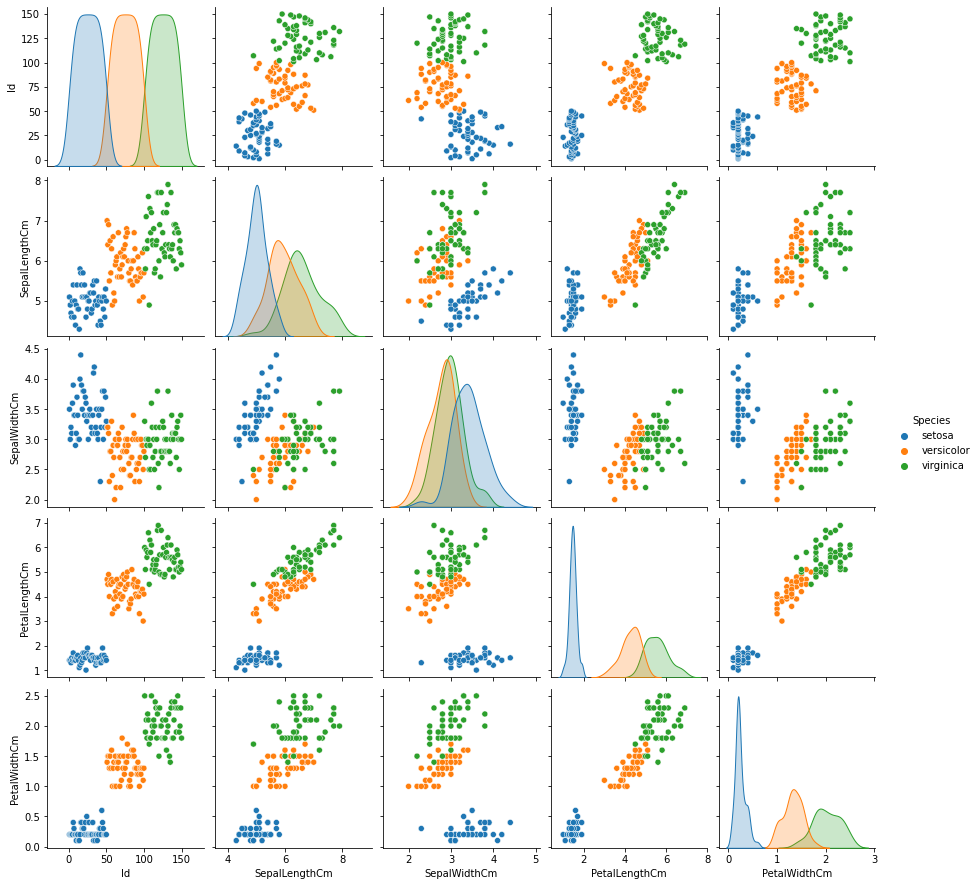

In [ ]:
sns.pairplot(df, hue="Species")

In [ ]:
df.drop('Species',axis=1,inplace = True)

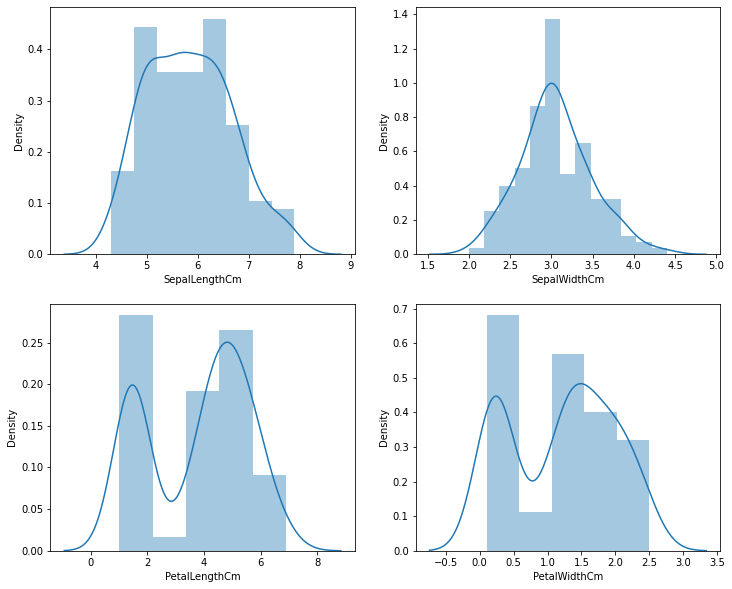

In [ ]:
feature = df.iloc[:,1:10]
plt.figure(figsize=(12,10))
for i in enumerate(feature):
  plt.subplot(2,2,i[0]+1)
  sns.distplot(df[i[1]])



#I will be using petal length and petal width as they show some variation hence they can be more informative as they might help in segregating clusters.whereas sepal length and sepal width as they are normally distributed. 

checking outliers



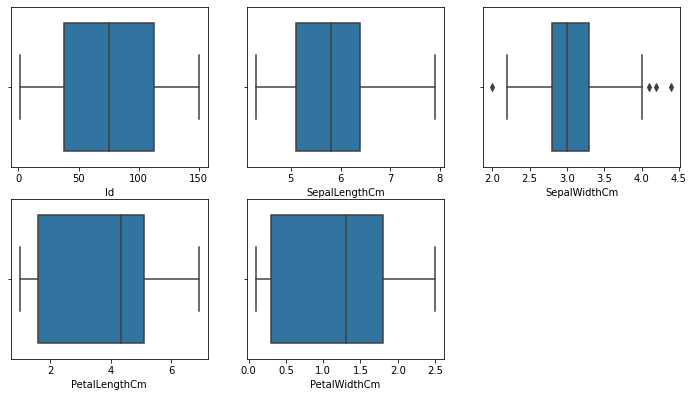

In [ ]:
 plt.figure(figsize = (12,10))
 features = df.columns
 for i in enumerate(features):
   plt.subplot(3,3,i[0]+1)
   sns.boxplot(df[i[1]])

Fixing Outliers wih soft capping



In [ ]:
q1 = df['SepalLengthCm'].quantile(0.01)
q4 =  df['SepalLengthCm'].quantile(0.99)

df['SepalLengthCm'][df['SepalLengthCm']<=q1] = q1
df['SepalLengthCm'][df['SepalLengthCm']>=q4] = q4

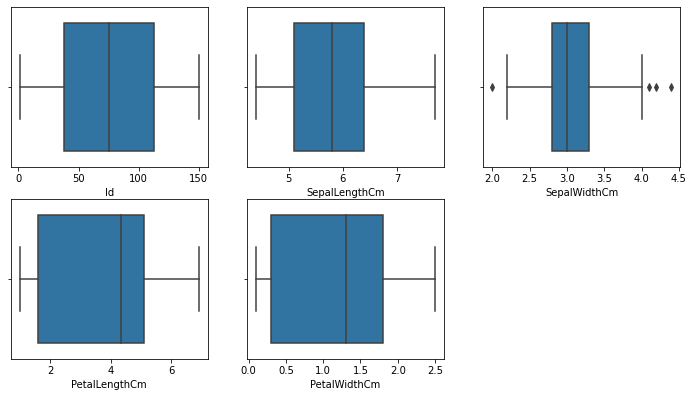

In [ ]:
 plt.figure(figsize = (12,10))
 features = df.columns
 for i in enumerate(features):
   plt.subplot(3,3,i[0]+1)
   sns.boxplot(df[i[1]])

The Hopkins statistic is a way of measuring the cluster tendency of a data set.It acts as a statistical hypothesis test where the null hypothesis is that the data is generated by a Poisson point process and are thus uniformly randomly distributed. A value close to 1 tends to indicate the data is highly clustered, random data will tend to result in values around 0.5, and uniformly distributed data will tend to result in values close to 0.


In [ ]:
#Hoppkins check
#Calculating the Hopkins statistic
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [ ]:
# Hopkins score

hopkins(df.drop('Id',axis=1))

0.8572189885871823

after running the Hopkins test for around 10 times we get average score as 0.85 which is a good score hence we can conclude the data is fit or clustering.


In [ ]:
#SCALING
rfm_df = df.drop("Id",axis=1)
scaler = StandardScaler()
rfm_df_scaled = scaler.fit_transform(rfm_df)

In [ ]:
rfm_df_scaled 

array([[-9.04673878e-01,  1.03205722e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14830239e+00, -1.24957601e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.39193090e+00,  3.37848329e-01, -1.39813811e+00,
        -1.31297673e+00],
       [-1.51374516e+00,  1.06445364e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.02648813e+00,  1.26346019e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-5.39231109e-01,  1.95766909e+00, -1.17067529e+00,
        -1.05003079e+00],
       [-1.51374516e+00,  8.00654259e-01, -1.34127240e+00,
        -1.18150376e+00],
       [-1.02648813e+00,  8.00654259e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.75737367e+00, -3.56360566e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14830239e+00,  1.06445364e-01, -1.28440670e+00,
        -1.44444970e+00],
       [-5.39231109e-01,  1.49486315e+00, -1.28440670e+00,
        -1.31297673e+00],
       [-1.27011665e+00,  8.00654259e-01, -1.22754100e+00,
      

In [ ]:
df1 = pd.DataFrame(rfm_df_scaled,columns = df.columns[1:10])
df1.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,-0.904674,1.032057,-1.341272,-1.312977
1,-1.148302,-0.124958,-1.341272,-1.312977
2,-1.391931,0.337848,-1.398138,-1.312977
3,-1.513745,0.106445,-1.284407,-1.312977
4,-1.026488,1.263460,-1.341272,-1.312977


To find the optimial number of clustering we will be using both hirechial and KMeans clustering.

In KMeans clustering we will find the number of clusters using SILHOUETTE  curve and elbow curve

In [ ]:
#k-means using arbitary k
kmeans = KMeans(n_clusters=4, init='k-means++', n_init=10, max_iter=300, tol=0.0001, precompute_distances='auto', 
                verbose=0, random_state=50, copy_x=True, n_jobs=None, algorithm='auto')
kmeans.fit(df1)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=50, tol=0.0001, verbose=0)

In [ ]:
kmeans.labels_

array([3, 1, 1, 1, 3, 3, 1, 1, 1, 1, 3, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 1, 1, 1, 1, 3, 1, 1, 1, 3, 3, 3, 1, 1, 3, 1, 1, 1, 3, 1, 1, 3,
       3, 1, 3, 1, 3, 1, 0, 0, 0, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 0,
       2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2], dtype=int32)

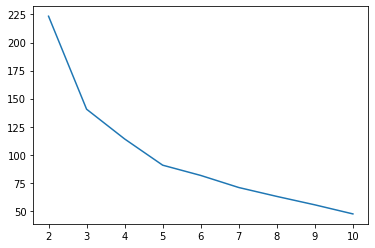

In [ ]:
#finding optimal cluster using elbow curve

ssd = []
for k in range(2,11):
  kmean = KMeans(n_clusters=k).fit(df1)
  ssd.append([k , kmean.inertia_])
temp = pd.DataFrame(ssd)
plt.plot(temp[0],temp[1])

Looking at the above elbow curve it looks good to proceed with either 2 or 3 clusters.

SILHOUETTE Analysis

SILHOUETTE score = p-q/max(p,q)

where p is the mean distance to the point in the nearest cluster that the data point is not a part of
q is the mean intra-cluster distance to all the points in its own cluster

The value of the silhouette score range lies between -1 to 1.

A score closer to 1 indicates that the data point is very similar to other data points in the cluster,

A score closer to -1 indicates that the data point is not similar to the data points in its cluster.

In [ ]:
# silhouette analysis
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(df1)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(df1, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.5802891040633805
For n_clusters=3, the silhouette score is 0.45946201218261695
For n_clusters=4, the silhouette score is 0.38924913368536435
For n_clusters=5, the silhouette score is 0.3483892463921642
For n_clusters=6, the silhouette score is 0.3542079875933352
For n_clusters=7, the silhouette score is 0.33047283832985014
For n_clusters=8, the silhouette score is 0.3417581566726788


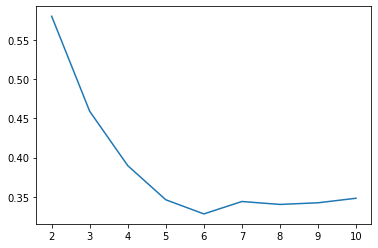

In [ ]:
from sklearn.metrics import silhouette_score
ss = []
for k in range(2, 11):
    kmean = KMeans(n_clusters = k).fit(df1)
    ss.append([k, silhouette_score(df1, kmean.labels_)])
temp = pd.DataFrame(ss)    
plt.plot(temp[0], temp[1])

In [ ]:
# We can chose between k = 2,3 as they are nearer to 1. But we will go ahead with k =3 as k =2 would imply dividing the dataset into 2 halves which maynot give desired reults.

In [ ]:
# final model with k=3
kmeans = KMeans(n_clusters=3, init='k-means++', 
            max_iter=100, n_init=1, verbose=0, random_state=3425)
kmeans.fit(df1)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
       n_clusters=3, n_init=1, n_jobs=None, precompute_distances='auto',
       random_state=3425, tol=0.0001, verbose=0)

In [ ]:
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 2, 0, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 0,
       2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0], dtype=int32)

In [ ]:
df_kmean = df.copy()

In [ ]:
label  = pd.DataFrame(kmeans.labels_, columns= ['label'])
label

,label
0,1
1,1
2,1
3,1
4,1
...,...
145,0
146,2
147,0
148,0


In [ ]:
df_kmean = pd.concat([df_kmean, label], axis =1)
df_kmean.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,label
0,1,5.1,3.5,1.4,0.2,1
1,2,4.9,3.0,1.4,0.2,1
2,3,4.7,3.2,1.3,0.2,1
3,4,4.6,3.1,1.5,0.2,1
4,5,5.0,3.6,1.4,0.2,1


In [ ]:
df_kmean.label.value_counts()

0    55
1    49
2    46
Name: label, dtype: int64

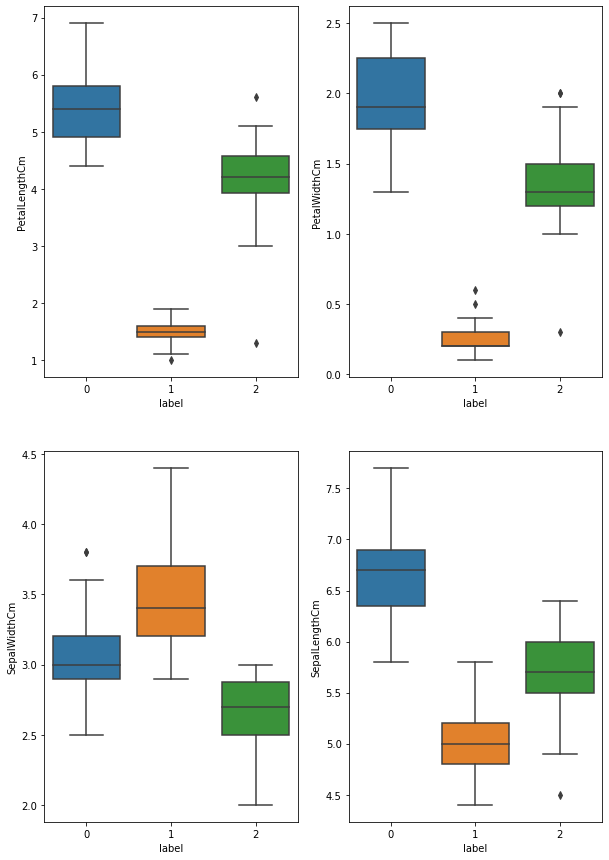

In [ ]:
plt.figure(figsize=(10, 15))
plt.subplot(2,2,1)
sns.boxplot(x='label', y='PetalLengthCm', data=df_kmean)
            
plt.subplot(2,2,2)
sns.boxplot(x='label', y='PetalWidthCm', data=df_kmean)

plt.subplot(2,2,3)
sns.boxplot(x='label', y='SepalWidthCm', data=df_kmean)

plt.subplot(2,2,4)
sns.boxplot(x='label', y='SepalLengthCm', data=df_kmean)


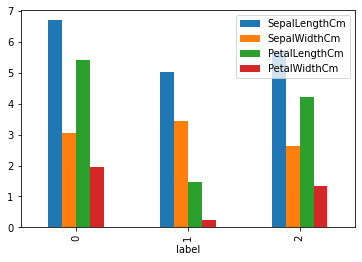

In [ ]:
df_kmean.drop(['Id'],axis=1).groupby('label').mean().plot(kind = 'bar')
plt.show()

From both the plots we infer that cluster0 has highest sepal length and cluster1 has lowest petal width

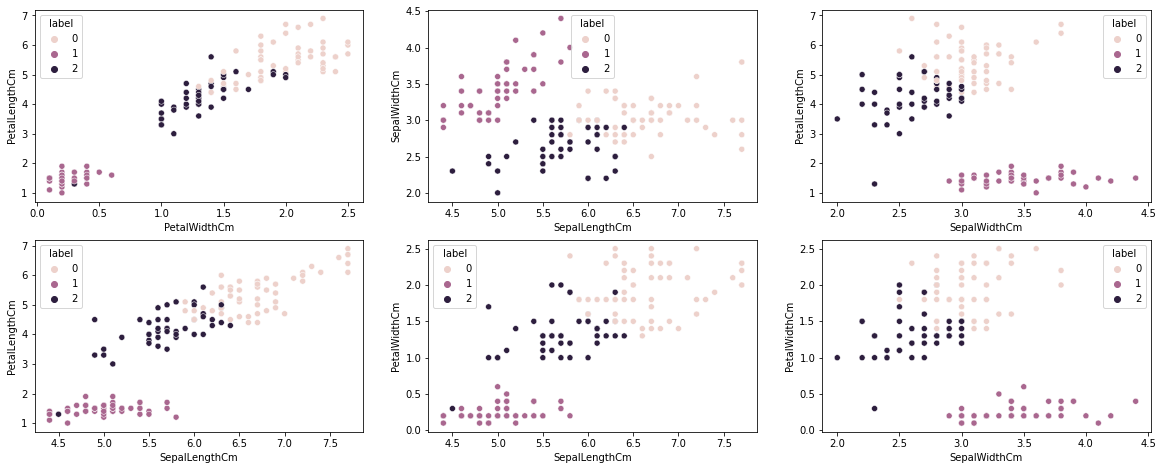

In [ ]:
#cluster profiling
plt.figure(figsize=(20, 12))
plt.subplot(3,3,1)
sns.scatterplot(data = df_kmean, y= 'PetalLengthCm', x = 'PetalWidthCm',hue='label')
plt.subplot(3,3,2)
sns.scatterplot(data = df_kmean, y= 'SepalWidthCm', x = 'SepalLengthCm',hue='label')
plt.subplot(3,3,3)
sns.scatterplot(data = df_kmean, y= 'PetalLengthCm', x = 'SepalWidthCm',hue='label')
plt.subplot(3,3,4)
sns.scatterplot(data = df_kmean, y= 'PetalLengthCm', x = 'SepalLengthCm',hue='label')
plt.subplot(3,3,5)
sns.scatterplot(data = df_kmean, y= 'PetalWidthCm', x = 'SepalLengthCm',hue='label')
plt.subplot(3,3,6)
sns.scatterplot(data = df_kmean, y= 'PetalWidthCm', x = 'SepalWidthCm',hue='label')
                   

In [ ]:
df_kmean[df_kmean['label'] == 1].head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,label
0,1,5.1,3.5,1.4,0.2,1
1,2,4.9,3.0,1.4,0.2,1
2,3,4.7,3.2,1.3,0.2,1
3,4,4.6,3.1,1.5,0.2,1
4,5,5.0,3.6,1.4,0.2,1


In [ ]:
df_kmean[df_kmean['label'] == 2].head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,label
41,42,4.5,2.3,1.3,0.3,2
53,54,5.5,2.3,4.0,1.3,2
55,56,5.7,2.8,4.5,1.3,2
57,58,4.9,2.4,3.3,1.0,2
59,60,5.2,2.7,3.9,1.4,2


In [ ]:
df_kmean[df_kmean['label'] == 0].head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,label
50,51,7.0,3.2,4.7,1.4,0
51,52,6.4,3.2,4.5,1.5,0
52,53,6.9,3.1,4.9,1.5,0
54,55,6.5,2.8,4.6,1.5,0
56,57,6.3,3.3,4.7,1.6,0


Hierarchical Clustering Hierarchical clustering involves creating clusters that have a predetermined ordering from top to bottom. For example, all files and folders on the hard disk are organized in a hierarchy. There are two types of hierarchical clustering, Divisive Agglomerative.

Single Linkage: In single linkage hierarchical clustering, the distance between two clusters is defined as the shortest distance between two points in each cluster.

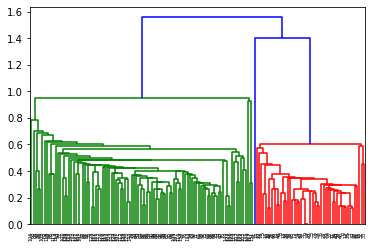

In [ ]:
# single linkage
mergings = linkage(df1, method="single", metric='euclidean')
dendrogram(mergings)
plt.show()

Since single linkage doesn't gives sense we will go for complete linkage

Complete Linkage In complete linkage hierarchical clustering, the distance between two clusters is defined as the longest distance between two points in each cluster.

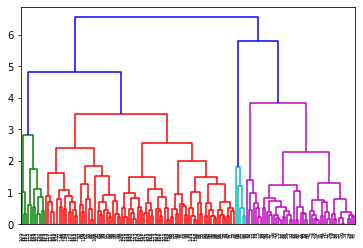

In [ ]:
# complete linkage
mergings = linkage(df1, method="complete", metric='euclidean')
dendrogram(mergings)
plt.show()

This shows how many clusters the data can be split into. 
Cutting the dendogram at height 5 would give us 3 clusters which
 would be most optimal

In [ ]:
cluster_labels = cut_tree(mergings,n_clusters = 3).reshape(-1)
cluster_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
df_cluster = df.copy()

In [ ]:
df['cluster_labels'] = cluster_labels
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,cluster_labels
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


In [ ]:
df['cluster_labels'].value_counts()

2    96
0    49
1     5
Name: cluster_labels, dtype: int64

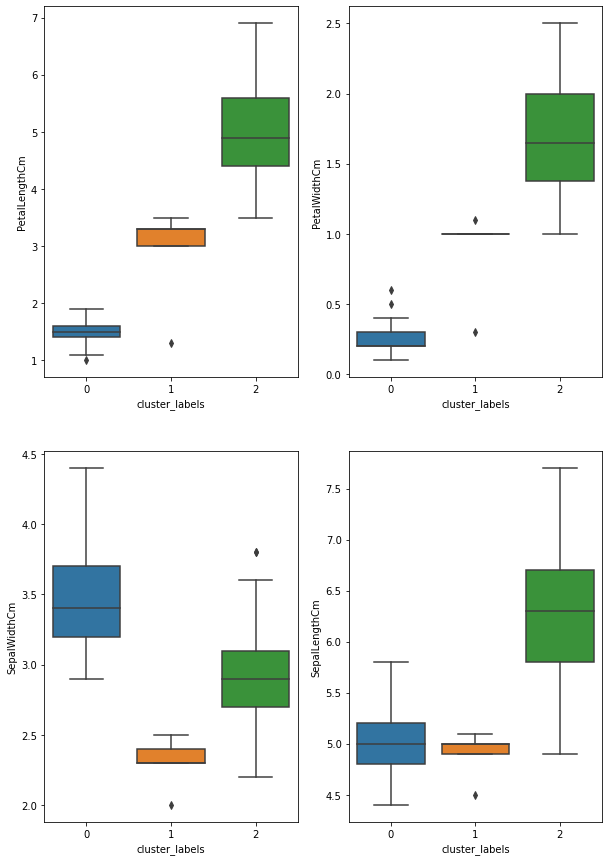

In [ ]:
plt.figure(figsize=(10, 15))
plt.subplot(2,2,1)
sns.boxplot(x='cluster_labels', y='PetalLengthCm', data=df)
            
plt.subplot(2,2,2)
sns.boxplot(x='cluster_labels', y='PetalWidthCm', data=df)

plt.subplot(2,2,3)
sns.boxplot(x='cluster_labels', y='SepalWidthCm', data=df)

plt.subplot(2,2,4)
sns.boxplot(x='cluster_labels', y='SepalLengthCm', data=df)


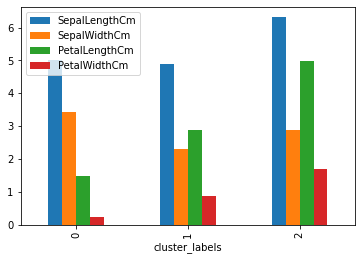

In [ ]:
df.drop(['Id'],axis=1).groupby('cluster_labels').mean().plot(kind = 'bar')


From both the plots we infer that cluster2 has highest sepal length and cluster0 has lowest petal width

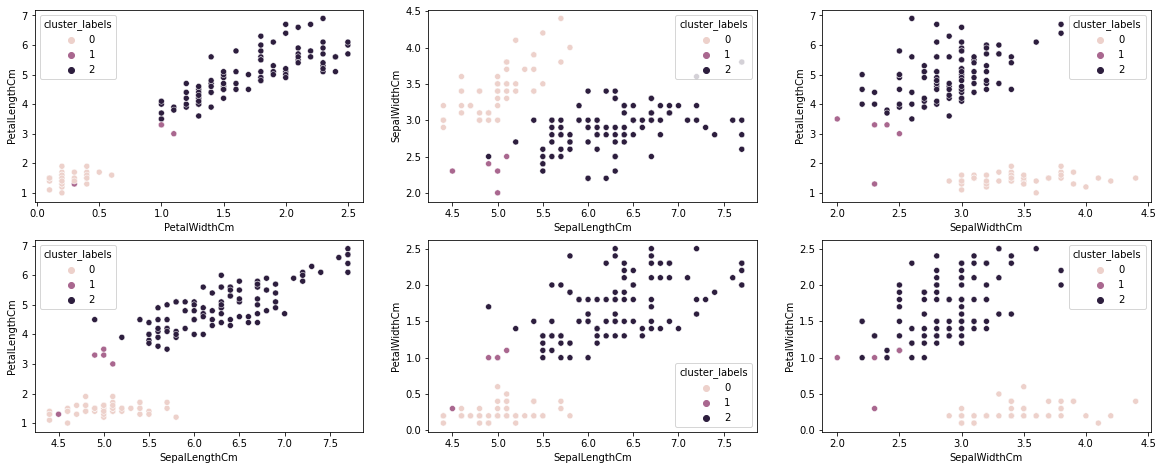

In [ ]:
#cluster profiling
plt.figure(figsize=(20, 12))
plt.subplot(3,3,1)
sns.scatterplot(data = df, y= 'PetalLengthCm', x = 'PetalWidthCm',hue='cluster_labels')
plt.subplot(3,3,2)
sns.scatterplot(data = df, y= 'SepalWidthCm', x = 'SepalLengthCm',hue='cluster_labels')
plt.subplot(3,3,3)
sns.scatterplot(data = df, y= 'PetalLengthCm', x = 'SepalWidthCm',hue='cluster_labels')
plt.subplot(3,3,4)
sns.scatterplot(data = df, y= 'PetalLengthCm', x = 'SepalLengthCm',hue='cluster_labels')
plt.subplot(3,3,5)
sns.scatterplot(data = df, y= 'PetalWidthCm', x = 'SepalLengthCm',hue='cluster_labels')
plt.subplot(3,3,6)
sns.scatterplot(data = df, y= 'PetalWidthCm', x = 'SepalWidthCm',hue='cluster_labels')

We have analyzed both K-means and Hierarchial clustering and found clusters formed are not identical 
 So, we conclude that there will be 3 optimal clusters.